# Classification Model with keras

### Import keras and packages

In [1]:
import keras
 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

Keras library includes the MSNT dataset. along with other datasets

### Load dataset

In [9]:
from keras.datasets import mnist

#read data

(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape #number of images , pixel size

(60000, 28, 28)

### Visualizing

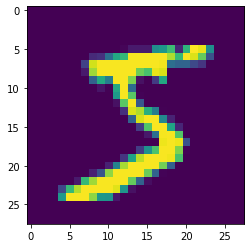

In [10]:
plt.imshow(X_train[0])

### Flatten the image
For to be fed into a neural network we need to flatten the image into 1 dimensional vectors of size 1 x (28*28)


In [11]:
num_pixels = X_train.shape[1]  * X_train.shape[2] #28*28

#now reshape it into a 1D vector
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')  #transform it into 1 * 784  
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

### Normalize

pixel values can range from 0-255 so we have to normalize it between 0 and 1

In [12]:
X_train = X_train / 255
X_test = X_test /255

### one hot encoding for categorical values

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build neural network

In [22]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu',input_shape=(num_pixels,)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    
    #compile model
    model.compile(optimizer='adam',loss='categorical_crossentropy',mectrics=['accuracy'])
    return model
    

## Train and test

In [24]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

ValueError: Session keyword arguments are not support during eager execution. You passed: {'mectrics': ['accuracy']}